### `Name : Berchmans Kevin S`

## `Text Classification using CNN-LSTM and Pre-trained IMDB Models`

In [1]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing. text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.optimizers import RMSprop , Adam
from keras.models import Sequential
from keras.layers import *
from nltk.corpus import stopwords 
nltk.download('stopwords') 
",".join(stopwords.words('english'))
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\online\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [4]:
data.shape

(50000, 2)

In [5]:
data.size

100000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
y =data['sentiment'] 
X=[] 
for review in data['review']: 
    filtered_sentence = [w.lower() for w in review.split() if not w in STOPWORDS ] 
    X.append(filtered_sentence)
X = pd.Series(X) 

In [9]:
y_tokenizer = Tokenizer() 
y_tokenizer.fit_on_texts(y) 
y_seq = np.array(y_tokenizer.texts_to_sequences (y))

In [10]:
X_token = Tokenizer(num_words=5000,oov_token='<oov>') 
X_token.fit_on_texts(X) 
word_index = X_token.word_index
X_sequence = X_token.texts_to_sequences(X) 
dict(list(word_index.items())[0:15])

{'<oov>': 1,
 'i': 2,
 '/><br': 3,
 'the': 4,
 'movie': 5,
 'film': 6,
 'one': 7,
 'like': 8,
 'this': 9,
 'would': 10,
 'even': 11,
 'good': 12,
 'really': 13,
 'it': 14,
 'see': 15}

In [11]:
X_padding= pad_sequences(X_sequence, maxlen=200, padding='post') 

In [12]:
print(y_seq.shape) 
print(X_padding.shape) 

(50000, 1)
(50000, 200)


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X_padding, y_seq,train_size=0.7)

In [14]:
print(x_train.shape, x_test.shape) 
print(y_train.shape, y_test.shape)

(35000, 200) (15000, 200)
(35000, 1) (15000, 1)


In [15]:
vocab_size = 5000 
embedding_dim = 64 
max_length = 200

In [16]:
model1 = Sequential() 
model1.add(Embedding(vocab_size, embedding_dim)) 
model1.add(LSTM(embedding_dim))
model1.add(Dense(embedding_dim, activation='tanh'))
model1.add(Dense(6,activation='softmax'))

In [17]:
model1. summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 357,574
Trainable params: 357,574
Non-trainable params: 0
_________________________________________________________________


In [18]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
history1 = model1.fit(x_train,y_train, epochs=20, verbose=2, validation_split=0.2)

Epoch 1/20
875/875 - 25s - loss: 0.7121 - accuracy: 0.4977 - val_loss: 0.6930 - val_accuracy: 0.5016 - 25s/epoch - 28ms/step
Epoch 2/20
875/875 - 23s - loss: 0.6928 - accuracy: 0.5122 - val_loss: 0.6849 - val_accuracy: 0.5289 - 23s/epoch - 27ms/step
Epoch 3/20
875/875 - 23s - loss: 0.6497 - accuracy: 0.5792 - val_loss: 0.5435 - val_accuracy: 0.7826 - 23s/epoch - 27ms/step
Epoch 4/20
875/875 - 23s - loss: 0.3414 - accuracy: 0.8540 - val_loss: 0.3125 - val_accuracy: 0.8684 - 23s/epoch - 26ms/step
Epoch 5/20
875/875 - 23s - loss: 0.2292 - accuracy: 0.9091 - val_loss: 0.3113 - val_accuracy: 0.8699 - 23s/epoch - 26ms/step
Epoch 6/20
875/875 - 23s - loss: 0.1793 - accuracy: 0.9335 - val_loss: 0.3382 - val_accuracy: 0.8677 - 23s/epoch - 27ms/step
Epoch 7/20
875/875 - 23s - loss: 0.1416 - accuracy: 0.9520 - val_loss: 0.3637 - val_accuracy: 0.8651 - 23s/epoch - 27ms/step
Epoch 8/20
875/875 - 23s - loss: 0.1068 - accuracy: 0.9673 - val_loss: 0.4347 - val_accuracy: 0.8584 - 23s/epoch - 27ms/step


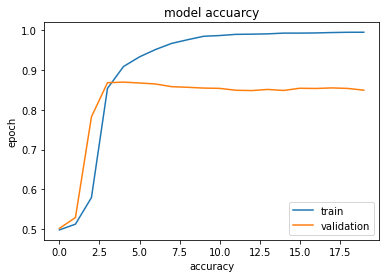

In [20]:
plt.plot(history1.history['accuracy']) 
plt.plot(history1.history['val_accuracy'])
plt.title('model accuarcy') 
plt.xlabel('accuracy') 
plt.ylabel('epoch') 
plt.legend(['train', 'validation'])
plt.show()

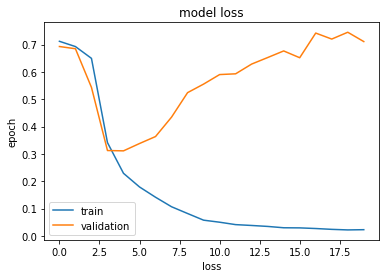

In [21]:
plt.plot(history1.history['loss']) 
plt.plot(history1.history['val_loss'])

plt.title('model loss') 
plt.xlabel('loss') 
plt.ylabel('epoch') 
plt.legend(['train', 'validation'])
plt.show() 

In [22]:
print("loss: ", model1.evaluate(x_test,y_test, verbose=0)[0]) 
print("accuarcy: ", model1.evaluate(x_test, y_test, verbose=0)[1]) 

loss:  0.7172414064407349
accuarcy:  0.8492000102996826


In [23]:
model2 = Sequential() 
model2.add(Embedding(vocab_size, embedding_dim)) 
model2.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu'))
model2.add(MaxPooling1D((2))) 
model2.add(LSTM(embedding_dim)) 
model2.add(Dense(128, activation= 'relu'))
model2.add(Dense(6, activation='softmax')) 


In [24]:
model2. summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 conv1d (Conv1D)             (None, None, 32)          10272     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [25]:
model2.compile (optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
history2 = model2.fit(x_train,y_train, epochs=20,validation_split=0.2, verbose=2) 

Epoch 1/20
875/875 - 20s - loss: 0.7053 - accuracy: 0.5184 - val_loss: 0.5445 - val_accuracy: 0.7777 - 20s/epoch - 22ms/step
Epoch 2/20
875/875 - 18s - loss: 0.4370 - accuracy: 0.8076 - val_loss: 0.3425 - val_accuracy: 0.8430 - 18s/epoch - 21ms/step
Epoch 3/20
875/875 - 18s - loss: 0.2750 - accuracy: 0.8883 - val_loss: 0.3234 - val_accuracy: 0.8574 - 18s/epoch - 20ms/step
Epoch 4/20
875/875 - 18s - loss: 0.2127 - accuracy: 0.9198 - val_loss: 0.3318 - val_accuracy: 0.8654 - 18s/epoch - 20ms/step
Epoch 5/20
875/875 - 18s - loss: 0.1574 - accuracy: 0.9446 - val_loss: 0.3517 - val_accuracy: 0.8636 - 18s/epoch - 20ms/step
Epoch 6/20
875/875 - 18s - loss: 0.1053 - accuracy: 0.9680 - val_loss: 0.4484 - val_accuracy: 0.8506 - 18s/epoch - 20ms/step
Epoch 7/20
875/875 - 18s - loss: 0.0723 - accuracy: 0.9806 - val_loss: 0.4981 - val_accuracy: 0.8579 - 18s/epoch - 20ms/step
Epoch 8/20
875/875 - 18s - loss: 0.0556 - accuracy: 0.9851 - val_loss: 0.5485 - val_accuracy: 0.8537 - 18s/epoch - 20ms/step


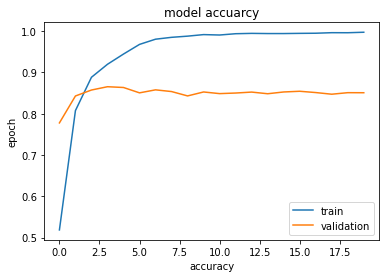

In [27]:
plt.plot(history2.history['accuracy']) 
plt.plot(history2.history['val_accuracy']) 
plt.title('model accuarcy') 
plt.xlabel('accuracy') 
plt.ylabel('epoch') 
plt.legend(['train', 'validation'])
plt.show() 

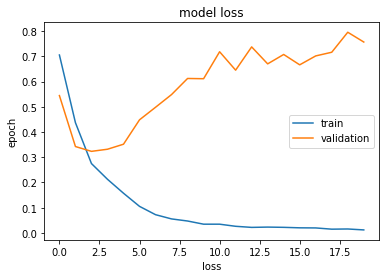

In [28]:
plt.plot(history2.history['loss']) 
plt.plot(history2.history['val_loss']) 
plt.title('model loss')
plt.xlabel('loss') 
plt.ylabel('epoch') 
plt.legend(['train', 'validation']) 
plt.show() 


In [29]:
score = model2.evaluate(x_test,y_test,verbose=0) 
print("loss: ", score[0]) 
print("accuracy: ", score[1])

loss:  0.7827519774436951
accuracy:  0.8493333458900452
